In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

symptoms = pd.read_csv(
    "https://raw.githubusercontent.com/upneetsingz-pixel/endometriosis-project/main/datasets/structured_endometriosis_data.csv"
)
sleep = pd.read_csv(
    "https://raw.githubusercontent.com/upneetsingz-pixel/endometriosis-project/main/datasets/Sleep_health_and_lifestyle_dataset.csv"
)

symptoms.head(), sleep.head()


(   Age  Menstrual_Irregularity  Chronic_Pain_Level  Hormone_Level_Abnormality  \
 0   24                       1            8.361531                          0   
 1   37                       1            4.995508                          0   
 2   46                       1            3.363996                          1   
 3   32                       1            5.246037                          0   
 4   28                       1            3.898932                          1   
 
    Infertility        BMI  Diagnosis  
 0            0  19.451314          0  
 1            0  22.388436          0  
 2            0  21.320443          0  
 3            0  20.177715          1  
 4            0  23.538103          1  ,
    Person ID Gender  Age            Occupation  Sleep Duration  \
 0          1   Male   27     Software Engineer             6.1   
 1          2   Male   28                Doctor             6.2   
 2          3   Male   28                Doctor             6.2 

In [3]:
print("Symptoms columns:", list(symptoms.columns))
print("Sleep columns:", list(sleep.columns))

Symptoms columns: ['Age', 'Menstrual_Irregularity', 'Chronic_Pain_Level', 'Hormone_Level_Abnormality', 'Infertility', 'BMI', 'Diagnosis']
Sleep columns: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']


In [6]:
CONFIG = {
    "symptom": {
        "pain": "Chronic_Pain_Level",
        "age": "Age"
    },
    "sleep": {
        "sleep_hours": "Sleep Duration",
        "stress": "Stress Level",
        "quality": "Quality of Sleep",
        "activity": "Physical Activity Level",
        "age": "Age"
    }
}

CONFIG

{'symptom': {'pain': 'Chronic_Pain_Level', 'age': 'Age'},
 'sleep': {'sleep_hours': 'Sleep Duration',
  'stress': 'Stress Level',
  'quality': 'Quality of Sleep',
  'activity': 'Physical Activity Level',
  'age': 'Age'}}

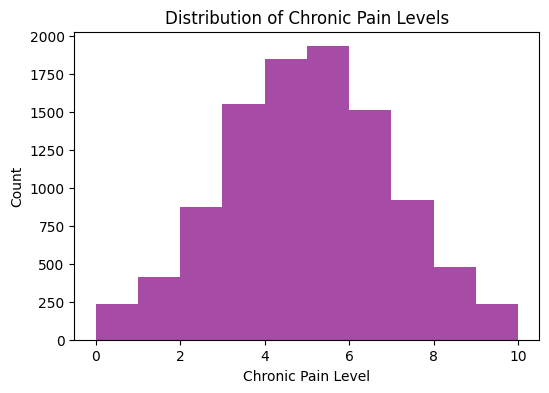

,Chronic_Pain_Level
count,10000.000000
mean,5.030619
std,1.983955
min,0.000000
25%,3.671697
50%,5.035825
75%,6.396854
max,10.000000


In [7]:
pain_col = CONFIG["symptom"]["pain"]

plt.figure(figsize=(6,4))
plt.hist(symptoms[pain_col], bins=10, color='purple', alpha=0.7)
plt.xlabel("Chronic Pain Level")
plt.ylabel("Count")
plt.title("Distribution of Chronic Pain Levels")
plt.show()

symptoms[pain_col].describe()

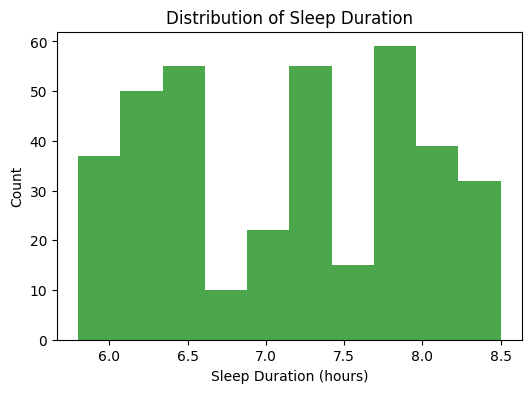

,Sleep Duration
count,374.000000
mean,7.132086
std,0.795657
min,5.800000
25%,6.400000
50%,7.200000
75%,7.800000
max,8.500000


In [8]:
sleep_hours_col = CONFIG["sleep"]["sleep_hours"]

plt.figure(figsize=(6,4))
plt.hist(sleep[sleep_hours_col], bins=10, color='green', alpha=0.7)
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Count")
plt.title("Distribution of Sleep Duration")
plt.show()

sleep[sleep_hours_col].describe()

In [9]:
merged = pd.merge(
    symptoms,
    sleep,
    left_on=CONFIG["symptom"]["age"],
    right_on=CONFIG["sleep"]["age"],
    suffixes=("_symptom", "_sleep")
)

merged.head()

,Age,Menstrual_Irregularity,Chronic_Pain_Level,Hormone_Level_Abnormality,Infertility,BMI,Diagnosis,Person ID,Gender,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,37,1,4.995508,0,0,22.388436,0,107,Female,Nurse,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,37,1,4.995508,0,0,22.388436,0,108,Male,Engineer,7.8,8,70,4,Normal Weight,120/80,68,7000,NaN
2,37,1,4.995508,0,0,22.388436,0,109,Male,Engineer,7.8,8,70,4,Normal Weight,120/80,68,7000,NaN
3,37,1,4.995508,0,0,22.388436,0,110,Male,Lawyer,7.4,8,60,5,Normal,130/85,68,8000,NaN
4,37,1,4.995508,0,0,22.388436,0,111,Female,Accountant,7.2,8,60,4,Normal,115/75,68,7000,NaN


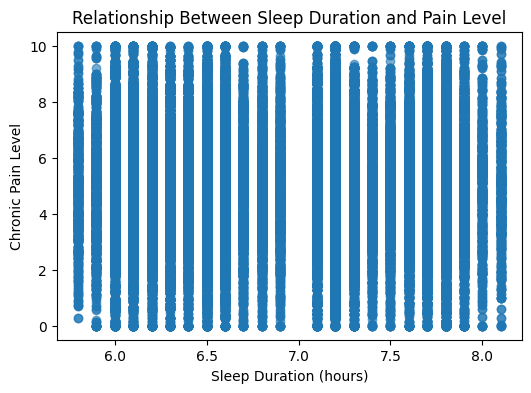

np.float64(0.010784848687807786)

In [10]:
pain_col = CONFIG["symptom"]["pain"]
sleep_col = CONFIG["sleep"]["sleep_hours"]

plt.figure(figsize=(6,4))
plt.scatter(merged[sleep_col], merged[pain_col], alpha=0.6)
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Chronic Pain Level")
plt.title("Relationship Between Sleep Duration and Pain Level")
plt.show()

corr = merged[[sleep_col, pain_col]].corr().iloc[0,1]
corr